In [1]:
import aniensemblestats as aes
import pandas as pd
import os

van Der Waals correction will be unavailable. Please install ased3


In [2]:
errdir = '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/'
efiles = [errdir+f for f in os.listdir(errdir)]
tsname = ['DrugBank',
          'Tripeptide',
          'GDB07to09',
          'GDB10to13',
         ]
print(efiles)

['/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_8.2.6.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_7.0.4.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_8.0.6.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_9.0.1.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_ANI-1.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_6.2.4.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_8.3.6.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_6.0.0.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_9.0.3.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_9.0.2.h5', '/home/jujuman/Research/DataReductionMethods/model6r/error_compare/tsdata_8.1.6.h5']


In [3]:
eed = aes.evaluate_ensemble_data(efiles)

for k in tsname:
    print('Calculating stats for:',k)
    print(eed.get_error_table(k))

Calculating stats for: DrugBank
       EMAE  ERMAE  ERMS  ERRMS  FMAE  FRMS  dEMAE  dERMS
6.0.0 29.08   3.75 40.25   5.67  5.90 10.70   4.69   6.69
6.2.4 30.35   3.93 42.80   5.85  5.97 11.17   4.94   7.16
7.0.4 12.99   2.83 17.84   4.11  4.58  7.78   3.49   4.89
8.0.6 14.78   2.82 19.33   4.05  4.49  7.84   3.51   4.89
8.1.6 10.55   2.43 14.68   3.50  4.10  6.77   3.12   4.35
8.2.6  2.63   1.70  4.13   2.38  3.06  4.80   2.20   3.02
8.3.6  2.73   1.67  4.27   2.38  2.97  4.73   2.15   2.98
9.0.1  2.61   1.65  4.34   2.33  2.92  4.64   2.13   2.95
9.0.2  2.71   1.63  4.96   2.30  2.92  4.72   2.09   2.90
9.0.3  2.52   1.62  4.03   2.28  2.92  4.64   2.10   2.89
ANI-1  8.76   2.51 15.49   4.14  3.59  9.90   3.02   4.72
Calculating stats for: Tripeptide
       EMAE  ERMAE  ERMS  ERRMS  FMAE  FRMS  dEMAE  dERMS
6.0.0 15.25   4.04 21.08  13.56  4.79 11.45   4.75  13.79
6.2.4 20.92   3.57 27.82   9.79  4.90 11.04   4.08  10.02
7.0.4 11.56   3.01 15.72   8.55  4.26  9.18   3.54   8.75
8.0.6 

In [4]:
eed.get_net_keys()

dict_keys(['8.1.6', '8.0.6', 'ANI-1', '8.2.6', '6.0.0', '9.0.2', '9.0.1', '8.3.6', '7.0.4', '9.0.3', '6.2.4'])

In [5]:
#eed.generate_correlation_plot('ANI-1','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('6.0.0','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('8.0.6','DrugBank','Fani','Fdft')
#eed.generate_correlation_plot('9.0.1','Tripeptide','Fani','Fdft')
#eed.generate_correlation_plot('9.0.2','DrugBank','Fani','Fdft')
#eed.generate_violin_distribution('GDB10to13')
#eed.plot_2d_error("6.0.0", "DrugBank", maxstd=100.0)

Axes(0.125,0.657941;0.775x0.222059)
Axes(0.125,0.391471;0.775x0.222059)
Axes(0.125,0.125;0.775x0.222059)


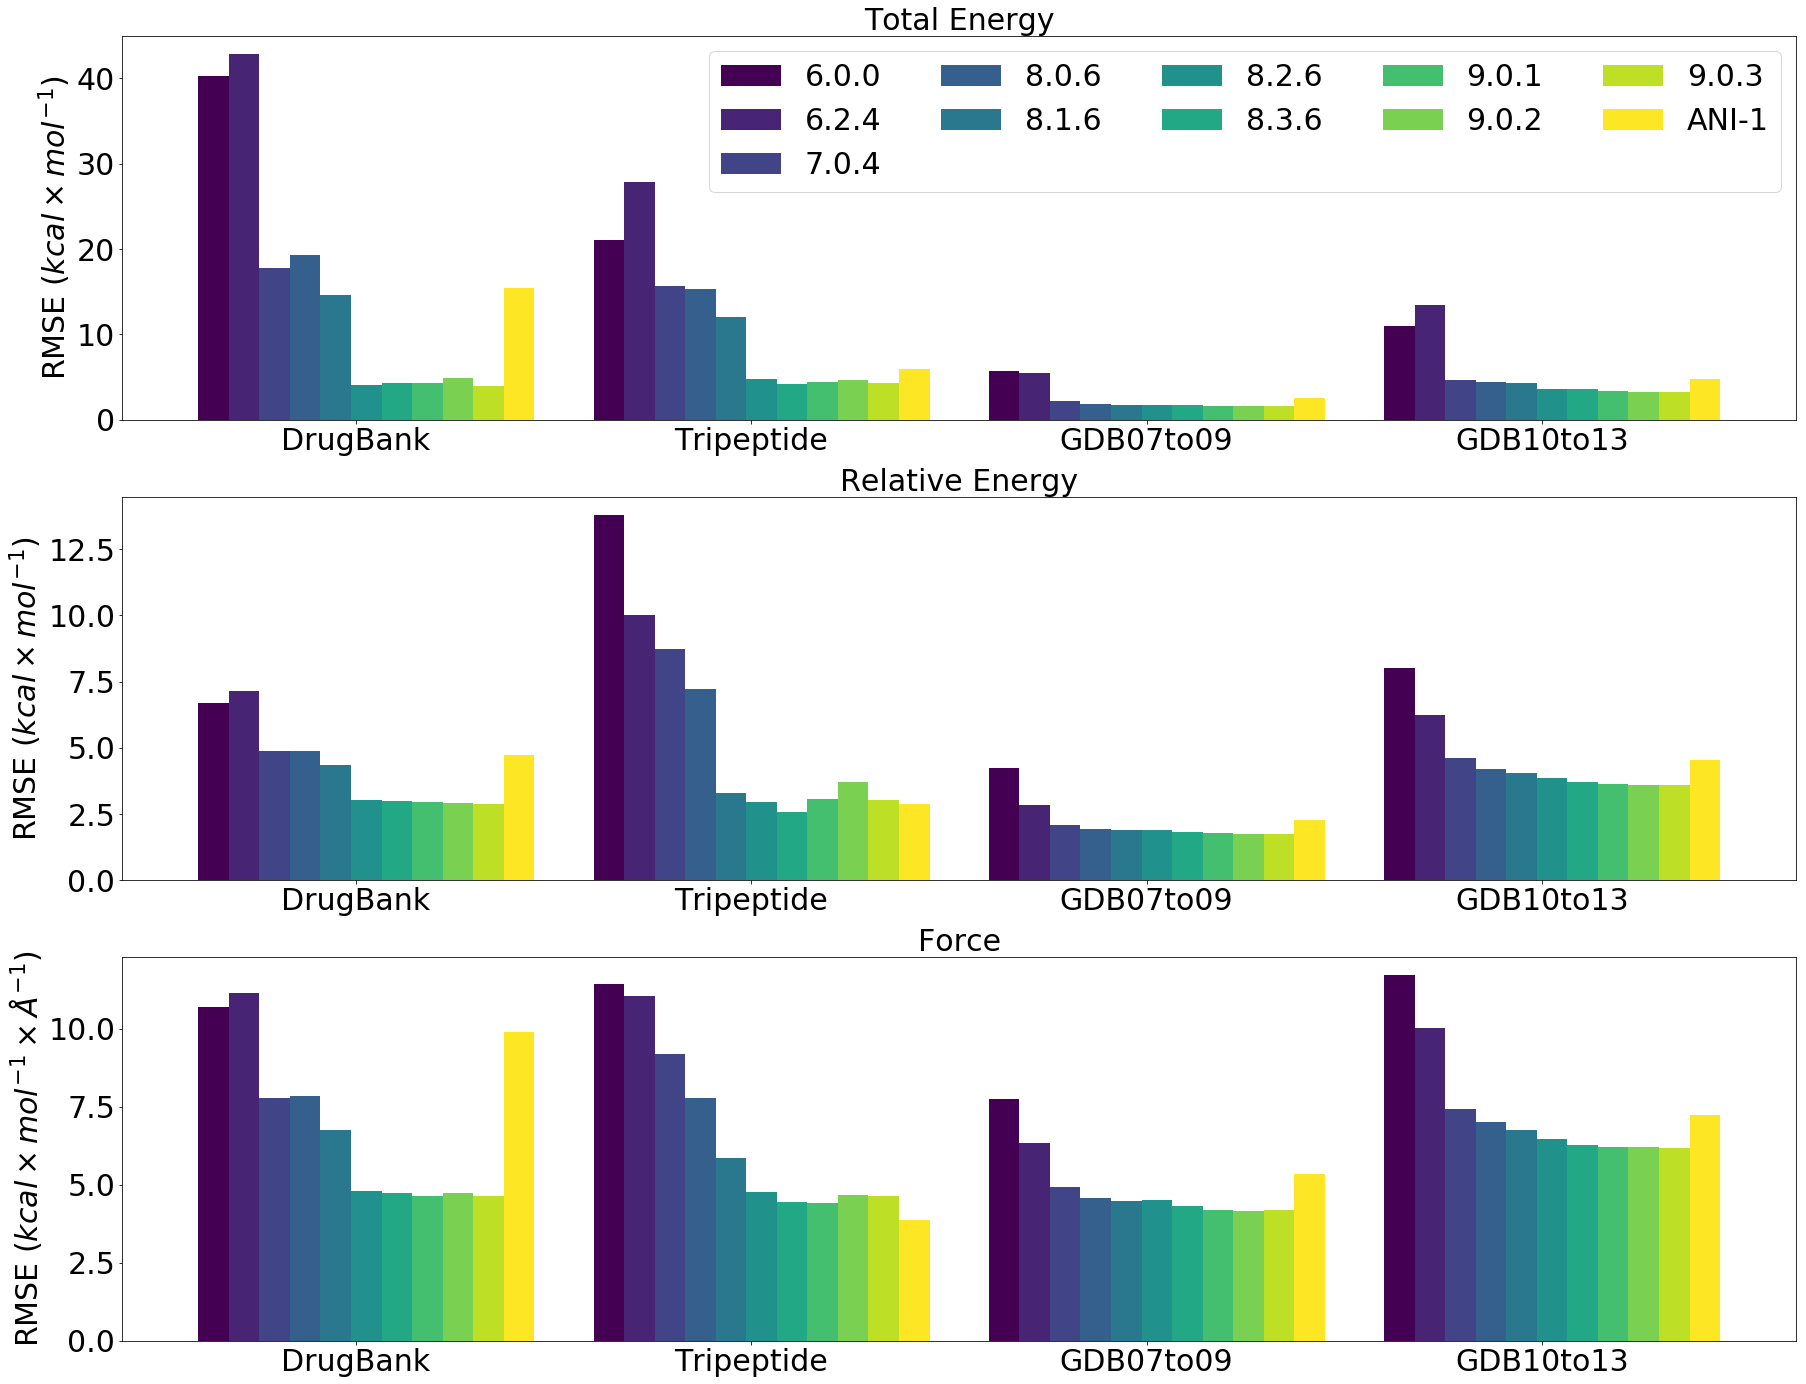

In [6]:
#eed.plot_2d_error("6.0.0", "DrugBank", maxstd=100.0)
eed.plot_bar_propsbynet([('Total Energy',r'RMSE ($kcal \times mol^{-1}$)','Eani','Edft'),
                         ('Relative Energy',r'RMSE ($kcal \times mol^{-1}$)','dEani', 'dEdft'),
                         ('Force',r'RMSE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft')], 
                        ['DrugBank', 'Tripeptide', 'GDB07to09', 'GDB10to13'], 
                        fontsize=30, bbox_to_anchor=(1.0, 1.0), figsize=(40.0, 32.0), ncol=5, errortype='RMSE')

Axes(0.125,0.657941;0.775x0.222059)
Axes(0.125,0.391471;0.775x0.222059)
Axes(0.125,0.125;0.775x0.222059)


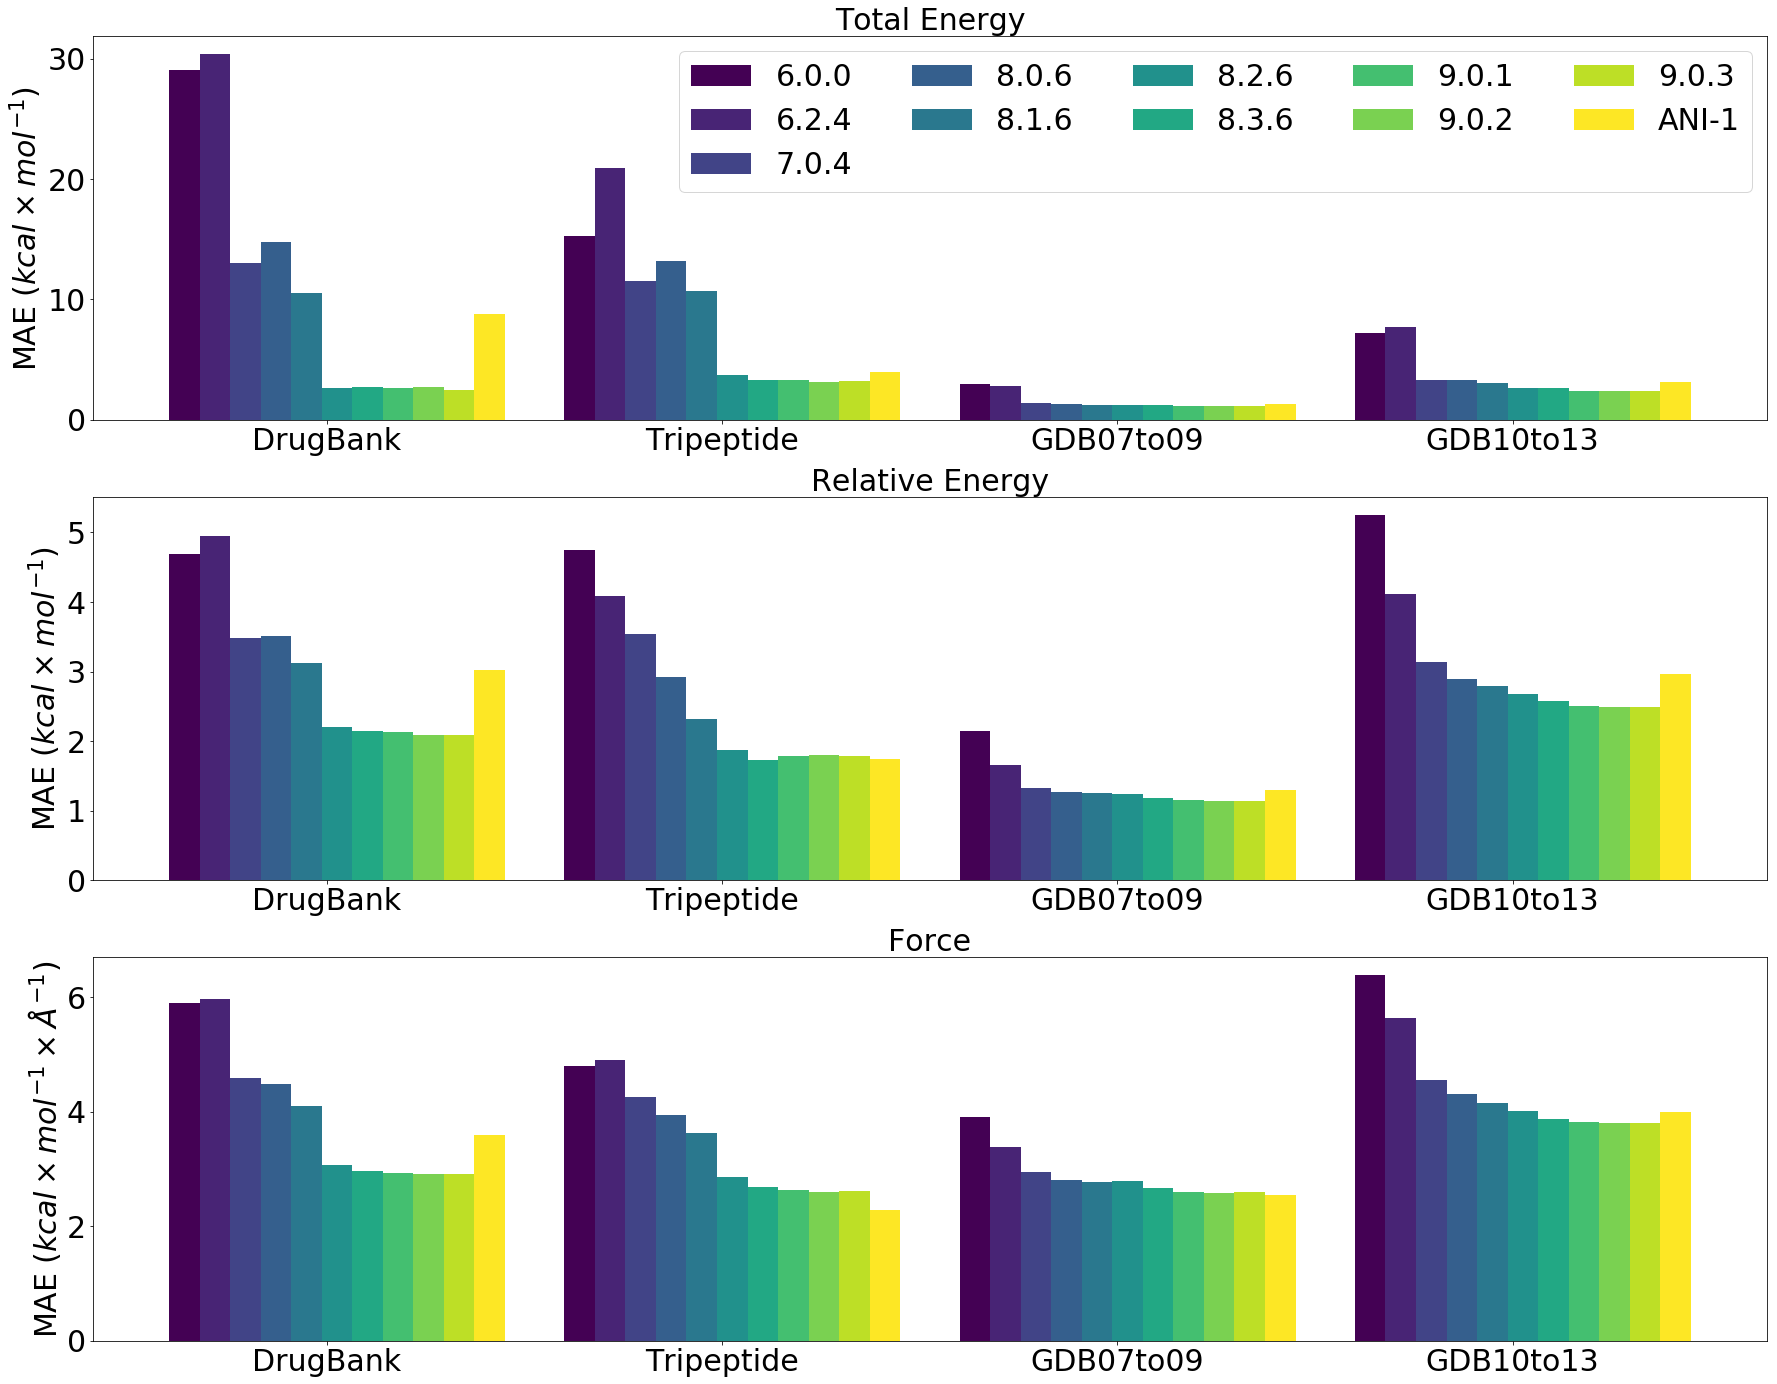

In [7]:
eed.plot_bar_propsbynet([('Total Energy',r'MAE ($kcal \times mol^{-1}$)','Eani','Edft'),
                         ('Relative Energy',r'MAE ($kcal \times mol^{-1}$)','dEani', 'dEdft'),
                         ('Force',r'MAE ($kcal \times mol^{-1} \times \AA^{-1}$)','Fani', 'Fdft')], 
                        ['DrugBank', 'Tripeptide', 'GDB07to09', 'GDB10to13'], 
                        fontsize=30, bbox_to_anchor=(1.0, 1.0), figsize=(40.0, 32.0), ncol=5, errortype='MAE')